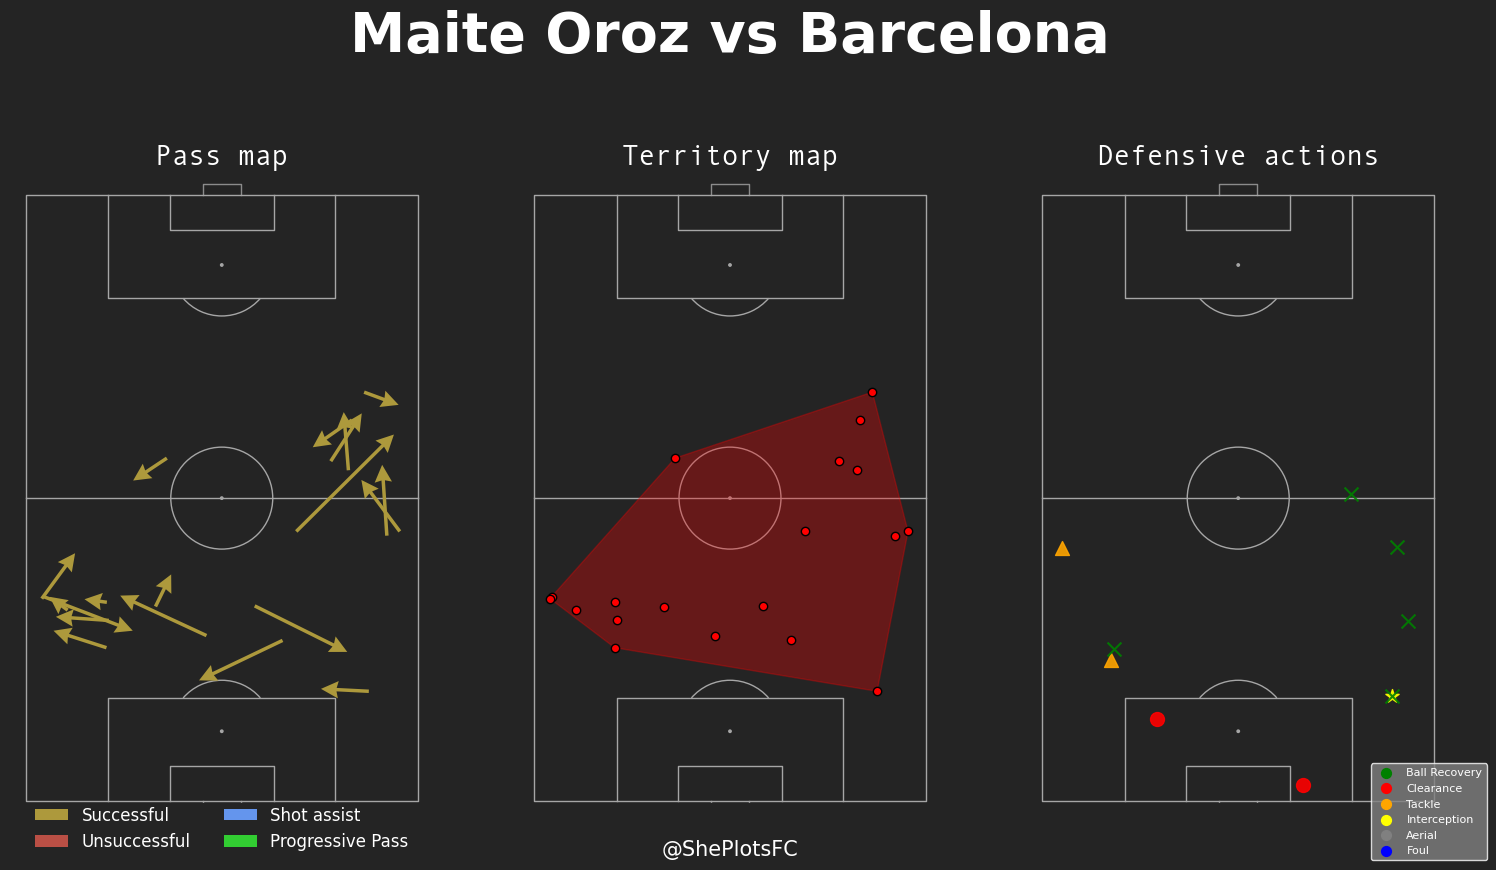

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from highlight_text import fig_text
import matplotlib as mpl
from mplsoccer.pitch import Pitch
from mplsoccer.pitch import VerticalPitch

from matplotlib import patches
import matplotlib.patheffects as path_effects
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
from scipy.ndimage import gaussian_filter
from mplsoccer import Pitch, FontManager
import math
from matplotlib.colors import to_rgba
from scipy.spatial import ConvexHull
from matplotlib.offsetbox import OffsetImage, AnnotationBbox



# load the data
fig, axs = plt.subplots(1, 3, figsize=(18, 12))
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)
fig.suptitle("Maite Oroz vs Barcelona", fontsize=40, color="w", fontweight='bold', x=0.5, y=0.90)


fig.set_facecolor('#242424')

ax = axs[0]


df = pd.read_excel("/Users/marclambertes/Downloads/BARMAD - Progressive passes.xlsx")
#df1 = df1.loc[(df1['contestantId']=='spi3g782q7m4evjxn1sv6cfa')].reset_index()
df = df.loc[(df['playerName']=="Maite Oroz")].reset_index()


#df1 = df1.loc[df1['progressive']==True].reset_index()

# Change the pitch line color to grey and line width to 1
pitch = VerticalPitch(pitch_type='opta', pad_bottom=0.5, pad_top=5, pitch_color='#242424', line_color='#a6a6a6',
                      linewidth=1, half=False, goal_type='box', goal_alpha=0.8)

pitch.draw(ax=ax)
figsize=(18, 12)
# add Dortmund logo


#df1 = df1.loc[df1['x'] > 50]
#df1 = df1.loc[df1['endX'] > 50]


for i, x in enumerate(df['x']):
    if 'outcome' in df.columns and df['outcome'].iloc[i] == 1 and df['Corner'].iloc[i] != 1:#and df1['Cutback'].iloc[i] == 1:
        end_x = pd.Series(df['endX'].iloc[i]).astype(float)
        end_y = pd.Series(df['endY'].iloc[i]).astype(float)
        pitch.arrows(df['x'].iloc[i], df['y'].iloc[i], end_x, end_y, 
                     width=2.5, zorder=2, headwidth=5, headlength=5, color='#ad993c', ax=ax)

      
        
for i, x in enumerate(df['x']):
    if 'outcome' in df.columns and df['outcome'].iloc[i] == 0 and df['Corner'].iloc[i] != 1:#and df1['Cutback'].iloc[i] == 1:
        end_x = pd.Series(df['endX'].iloc[i]).astype(float)
        end_y = pd.Series(df['endY'].iloc[i]).astype(float)
        pitch.arrows(df['x'].iloc[i], df['y'].iloc[i], end_x, end_y, 
                     width=2.5, zorder=2, headwidth=5, headlength=5, color='#ba4f45', ax=ax)
        
for i, x in enumerate(df['x']):
    if 'outcome' in df.columns and df['outcome'].iloc[i] == 1 and df['progressive'].iloc[i] == True and df['Corner'].iloc[i] != 1:
        end_x = pd.Series(df['endX'].iloc[i]).astype(float)
        end_y = pd.Series(df['endY'].iloc[i]).astype(float)
        pitch.arrows(df['x'].iloc[i], df['y'].iloc[i], end_x, end_y, 
                     width=2.5, zorder=2, headwidth=5, headlength=5, color='green', ax=ax)
        
for i, x in enumerate(df['x']):
    if 'outcome' in df.columns and df['outcome'].iloc[i] == 1 and df['Assist'].iloc[i] == 1 and df['Corner'].iloc[i] != 1:
        end_x = pd.Series(df['endX'].iloc[i]).astype(float)
        end_y = pd.Series(df['endY'].iloc[i]).astype(float)
        pitch.arrows(df['x'].iloc[i], df['y'].iloc[i], end_x, end_y, 
                     width=2.5, zorder=2, headwidth=5, headlength=5, color='cornflowerblue', ax=ax)
        




total_passes = len(df)
successful_passes = df[df['outcome'] == 1]['outcome'].count()
successful_percentage = (successful_passes / total_passes) * 100

   

# Change the background color to grey-black
fig.set_facecolor('#242424')


ax.set_title("Pass map", fontsize=20, color="w", fontfamily="Andale Mono", fontweight='bold', pad=8)

# Define colors for legend labels
#colors = {'Successful': '#ad993c', 'Unsuccessful': '#ba4f45'}

# Plot the legend outside the pitch
colors = {'Successful': '#ad993c', 'Unsuccessful': '#ba4f45', 'Shot assist': 'cornflowerblue', 'Progresssive Pass': "limegreen"}
labels = {'Successful': 'Successful', 'Unsuccessful': 'Unsuccessful', 'Shot assist': 'Shot assist', 'Progressive Pass': 'Progressive Pass'}

# Plot the legend outside the pitch
ax.legend(handles=[patches.Patch(facecolor=color) for color in colors.values()],
          labels=labels.values(), labelcolor='w', loc='lower center', bbox_to_anchor=(0.5, -0.1),
          ncol=2, frameon=False, fontsize=12)

ax = axs[1]


df = pd.read_excel("/Users/marclambertes/Downloads/BARMAD - Progressive passes.xlsx")
#df1 = df1.loc[(df1['contestantId']=='spi3g782q7m4evjxn1sv6cfa')].reset_index()
df = df.loc[(df['playerName']=="Maite Oroz")].reset_index()


#df1 = df1.loc[df1['progressive']==True].reset_index()

# Change the pitch line color to grey and line width to 1
pitch = VerticalPitch(pitch_type='opta', pad_bottom=0.5, pad_top=5, pitch_color='#242424', line_color='#a6a6a6',
                      linewidth=1, half=False, goal_type='box', goal_alpha=0.8)

pitch.draw(ax=ax)
figsize=(18, 12)

hull = pitch.convexhull(df.x, df.y)
poly = pitch.polygon(hull, ax=ax, edgecolor='red', facecolor='red', alpha=0.3)
scatter = pitch.scatter(df.x, df.y, ax=ax, edgecolor='black', facecolor='red')
# add Dortmund logo


#df1 = df1.loc[df1['x'] > 50]
#df1 = df1.loc[df1['endX'] > 50]
            

# Change the background color to grey-black
fig.set_facecolor('#242424')


ax.set_title("Territory map", fontsize=20, color="w", fontfamily="Andale Mono", fontweight='bold', pad=8)



ax = axs[2]

df1 = pd.read_excel("/Users/marclambertes/Downloads/BARMAD - Pass.xlsx")
#df1 = df1.loc[(df1['contestantId']=='5rurqie3qt1qav9ir5mkqinn')].reset_index()
df1 = df1.loc[(df1['playerName']=="Maite Oroz")].reset_index()


pitch = VerticalPitch(pitch_type='opta', pad_bottom=0.5, pad_top=5, pitch_color='#242424', line_color='#a6a6a6',
                      linewidth=1, half=False, goal_type='box', goal_alpha=0.8)

pitch.draw(ax=ax)
figsize=(18, 12)
fig.set_facecolor('#242424')

#team2 will feature right        
for x in range(len(df1['y'])):
    if df1['typeId'][x] == 49:
        plt.scatter(df1['y'][x], df1['x'][x], color='green', marker='x', s=100, alpha=.9, zorder=3)
    if df1['typeId'][x] == 12:
        plt.scatter(df1['y'][x], df1['x'][x], color='red', marker='o', s=100, alpha=.9, zorder=2)
    if df1['typeId'][x] == 7:
        plt.scatter(df1['y'][x], df1['x'][x], color='orange', marker='^',s=100, alpha=.9, zorder=2)
    if df1['typeId'][x] == 8:
        plt.scatter(df1['y'][x], df1['x'][x], color='yellow', marker='*',s=100, alpha=.9, zorder=2)  
    if df1['typeId'][x] == 44:
        plt.scatter(df1['y'][x], df1['x'][x], color='grey', marker='>', s=100, alpha=.9, zorder=2) 
    if df1['typeId'][x] == 4:
        plt.scatter(df1['y'][x], df1['x'][x], color='blue', marker='<', s=100, alpha=.9, zorder=2) 





colors = {'Ball Recovery': 'green', 'Clearance': 'red', 'Tackle': 'orange', 'Interception': 'yellow', 'Aerial': 'grey', 'Foul': 'blue'}
labels = {'Ball Recovery': 'Ball Recovery', 'Clearance': 'Clearance', 'Tackle': 'Tackle', 'Interception': 'Interception', 'Aerial': 'Aerial', 'Foul': 'Foul'}



# create a list of handles for each event type
handles = [plt.scatter([],[], marker='o', color=colors[label], s=50, alpha=1, zorder=3) for label in labels.values()]

# add the legend to the plot
legend = plt.legend(handles, labels.values(), loc='lower left', bbox_to_anchor=(0.8, -0.1), prop={'size': 8}, framealpha=0.8, labelcolor='w')

# set the facecolor and edgecolor of the legend
frame = legend.get_frame()
frame.set_facecolor('grey')
frame.set_edgecolor('white')

ax.set_title("Defensive actions", fontsize=20, color="w", fontfamily="Andale Mono", fontweight='bold', pad=8)

fig.text(0.5, 0.2, "@ShePlotsFC", fontsize=15, color="w", ha='center', va='center')
plt.savefig('Oroz.png', dpi=500, bbox_inches='tight', facecolor='#242424')

In [28]:
import tweepy

ACCESS_KEY = '1645091190021275648-2aF2QtfegDIPPb08gljYszydyF5Bpd'
ACCESS_SECRET = 'kzrnMAdMUq5vedvZ7ZqlczX0ojsL3MTUXsL8qzPpC59SA'
CONSUMER_KEY = '6b6qyiOt42ghG21wBZdvsaLSm'
CONSUMER_SECRET = 'osurgYS98Gh15814ixwlDPLqylQfxma0UDEvE3W586ciMSvDv4'

api = tweepy.Client(bearer_token='YOUR_BEARER_TOKEN',
                    access_token=ACCESS_KEY,
                    access_token_secret=ACCESS_SECRET,
                    consumer_key=CONSUMER_KEY,
                    consumer_secret=CONSUMER_SECRET)

auth = tweepy.OAuth1UserHandler(
    CONSUMER_KEY, CONSUMER_SECRET, ACCESS_KEY, ACCESS_SECRET
)
oldapi = tweepy.API(auth)

# List of media file names
media_files = ['Oroz.png']

# Upload the four media items
media_ids = []
for media_file in media_files:
    media = oldapi.media_upload(media_file)
    media_ids.append(media.media_id)

# Create a tweet with the four media items
api.create_tweet(text='Maite Oroz vs Barcelona', media_ids=media_ids)


Response(data={'edit_history_tweet_ids': ['1726234495890710807'], 'id': '1726234495890710807', 'text': 'Maite Oroz vs Barcelona https://t.co/9JFWpwf0aw'}, includes={}, errors=[], meta={})